<a href="https://colab.research.google.com/github/Aadiya-Pokhrel/freecodecamp_projects/blob/main/time_series_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [ ]:
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)

In [ ]:
df = pd.read_csv('fcc-forum-pageviews.csv', header=0, names=['Date','Page Views'], parse_dates= True, index_col=[0])

# Clean data

##### Alternative --- [  df = df[(df['Page Views'] > df['Page Views'].quantile(0.025)) & (df['Page Views'] < df['Page Views'].quantile(0.975))]  ]

In [ ]:
df = df[(df['Page Views'].between(df['Page Views'].quantile(0.025), df['Page Views'].quantile(0.975)))]

In [ ]:
months= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plots

## 1. Line Plot

In [ ]:
def draw_line_plot():
    # Draw line plot

    fig, ax = plt.subplots(figsize=(35,12))
    df.plot(y='Page Views',
            kind='line', c='red', linewidth=3, rot ='horizontal', fontsize= 24, ax=ax)
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019", fontsize= 36)
    ax.set_xlabel('Date', fontsize= 30)
    ax.set_ylabel('Page Views', fontsize= 30)
    ax.legend(fontsize= 24)


    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig


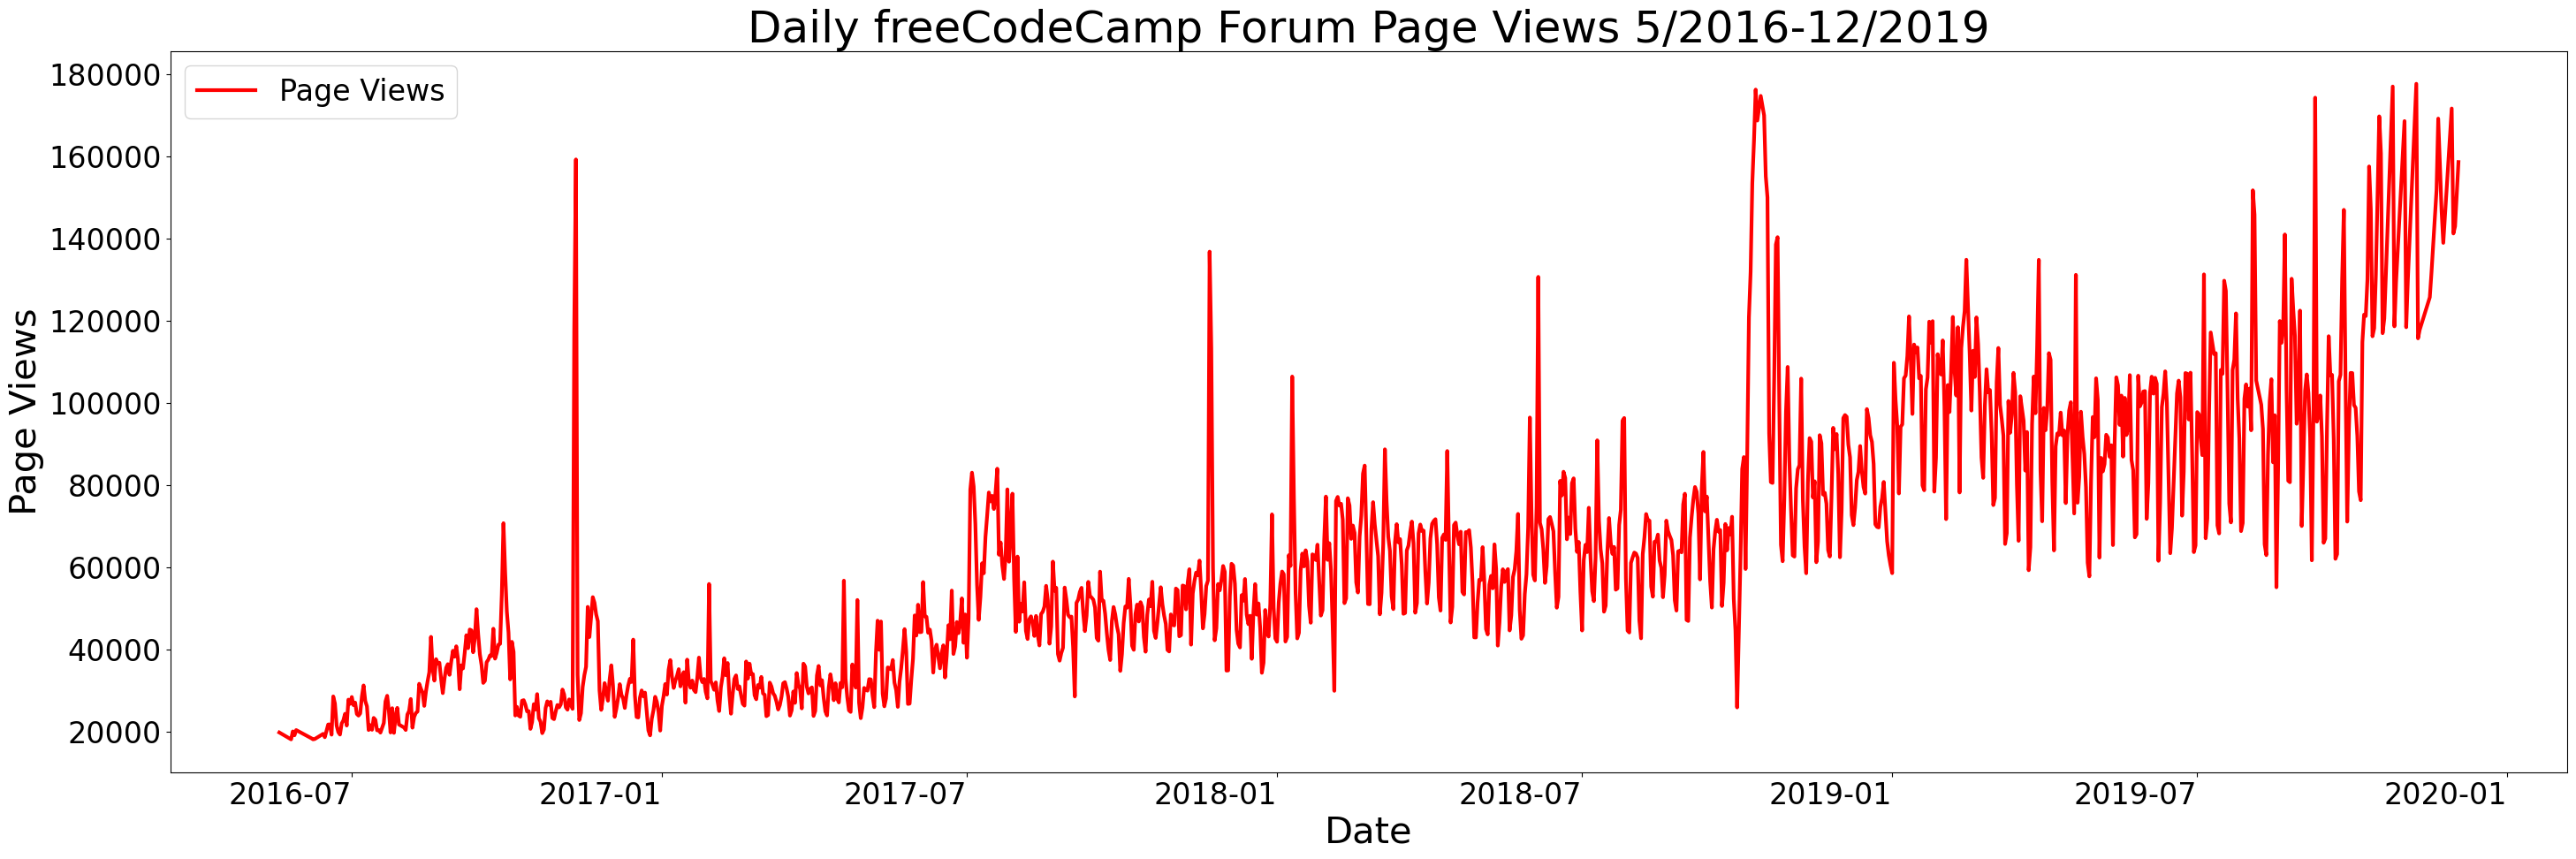

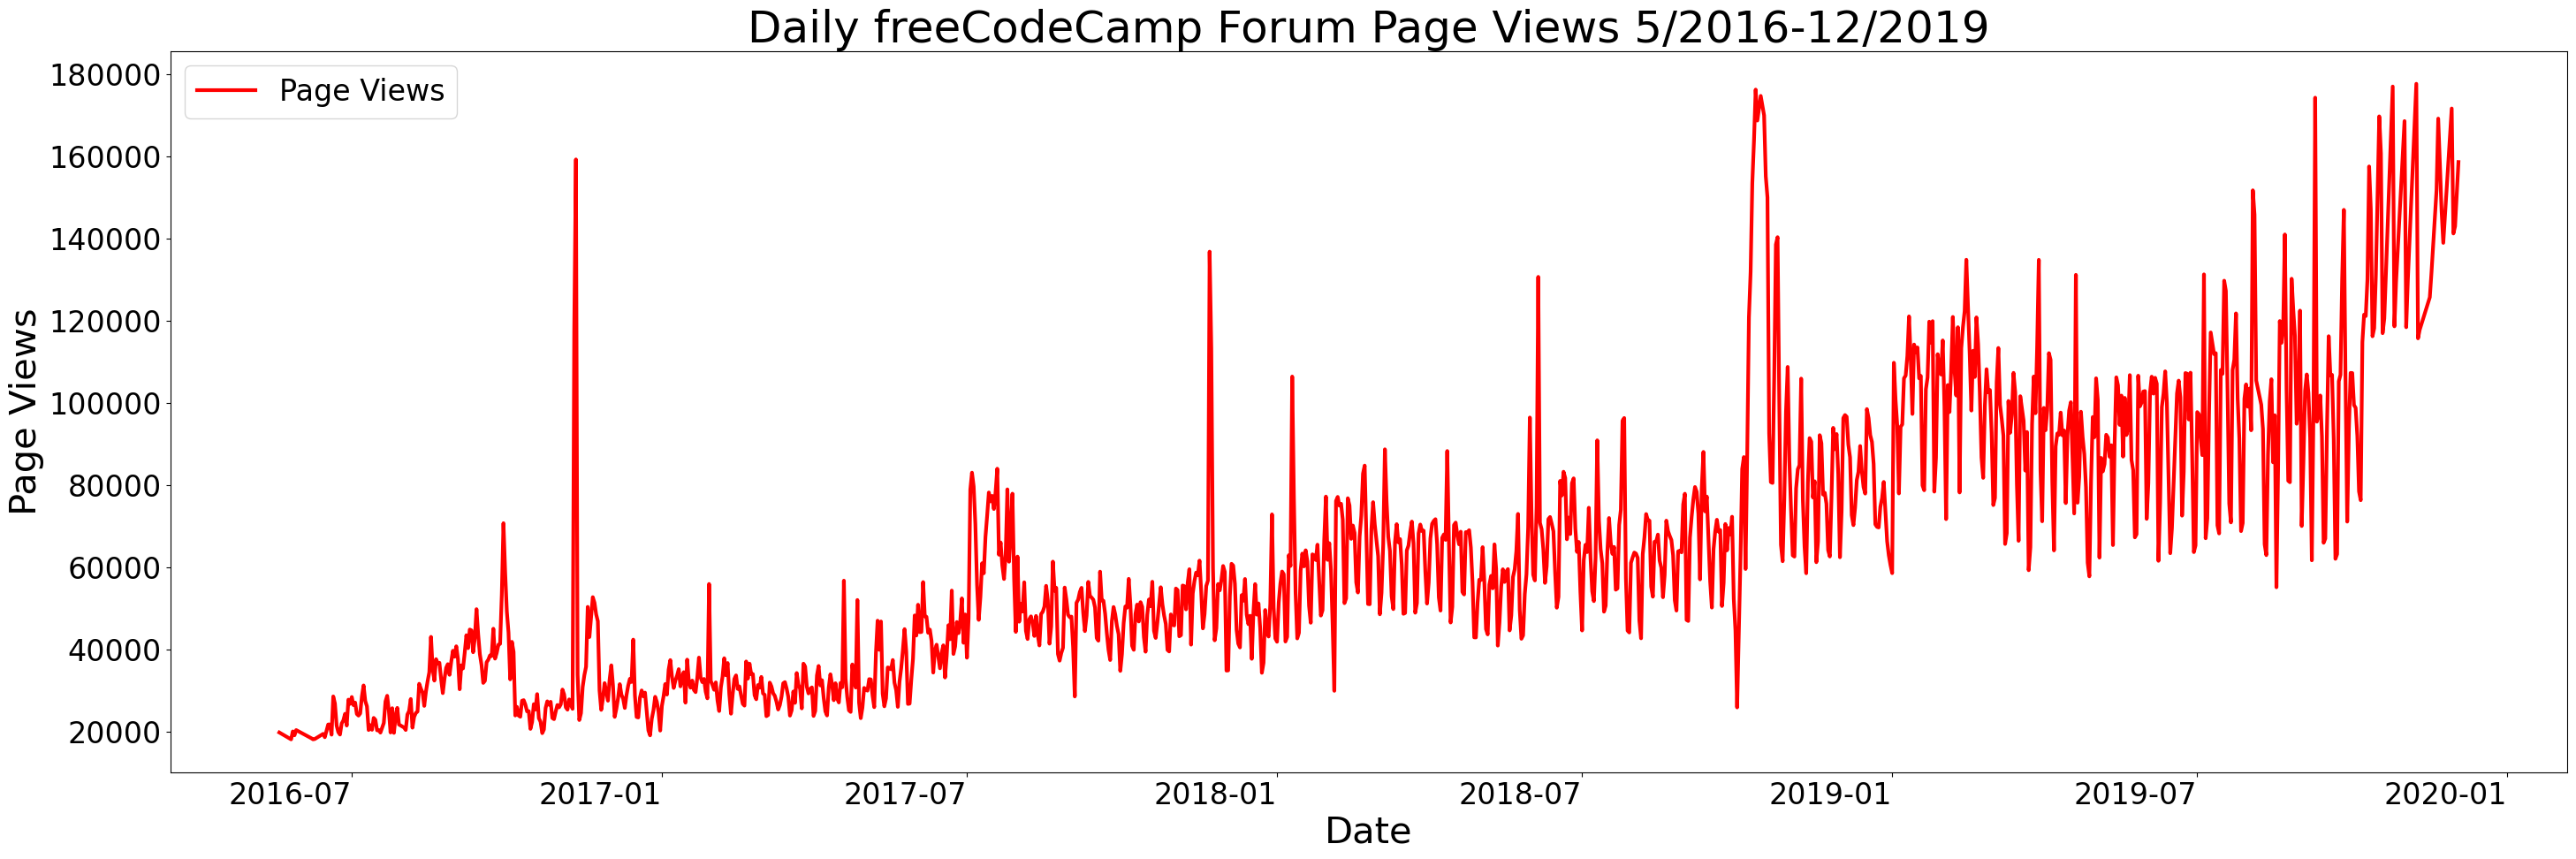

In [ ]:
draw_line_plot()

## 2. Bar Plot

In [ ]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot

    df_bar=df_bar=(df.reset_index()).copy()

    df_bar["year"] = pd.DatetimeIndex(df_bar['Date']).year
    df_bar["Month"] = pd.DatetimeIndex(df_bar['Date']).month
    Months= {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
    df_bar['Month']=df_bar['Month'].map(Months)

    # Draw bar plot

    fig, ax = plt.subplots(figsize=(15,7))
    sns.barplot(x="year", hue="Month", y="Page Views", data=df_bar,
            hue_order = months, palette="Paired", ci=None, ax=ax )
    ax.set(xlabel = "Years",ylabel = "Average Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

C:\Users\POKHREL\AppData\Local\Temp\ipykernel_16744\3972495607.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="year", hue="Month", y="Page Views", data=df_bar,


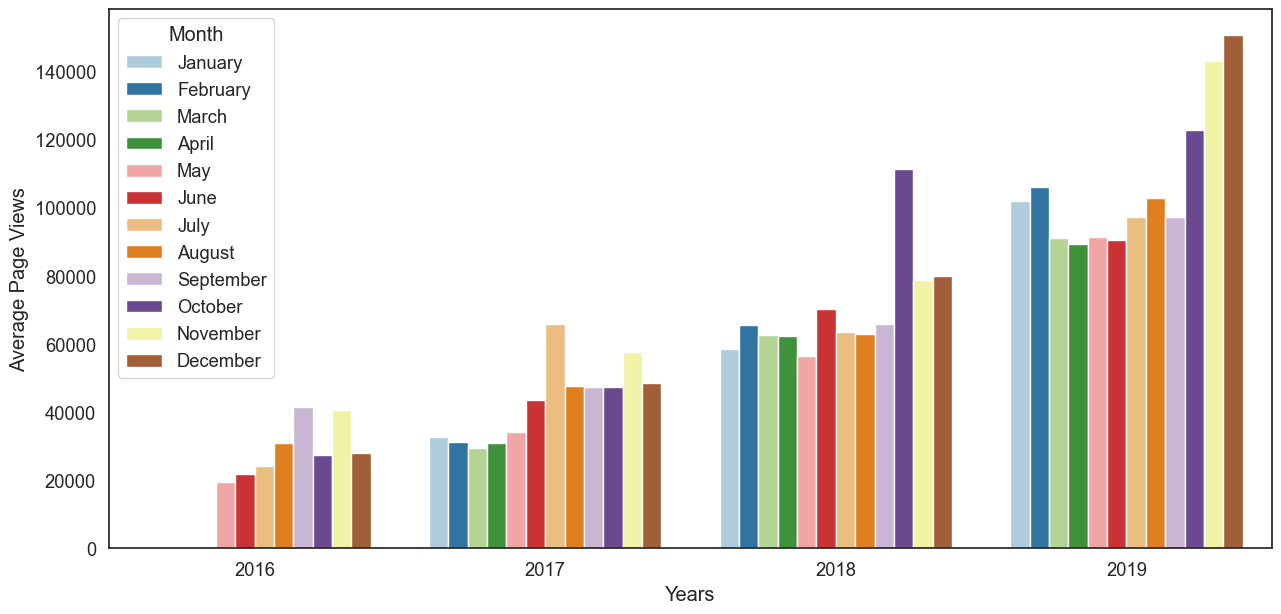

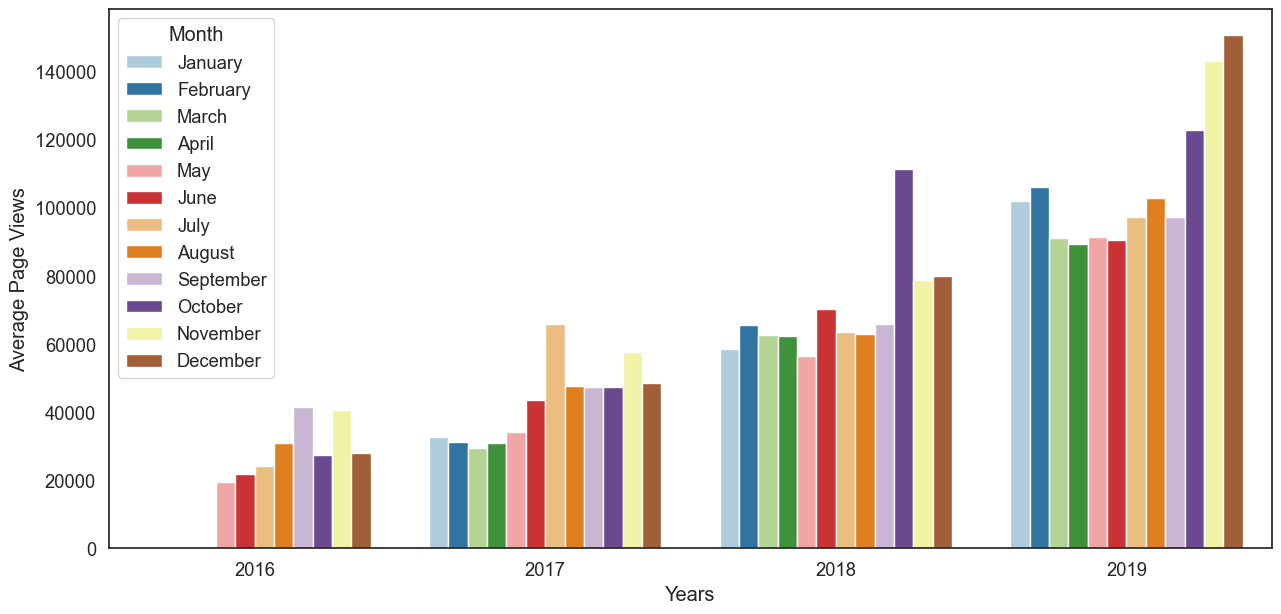

In [ ]:
draw_bar_plot()

## 3. Box Plot

In [ ]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.Date]
    df_box['month'] = [d.strftime('%b') for d in df_box.Date]
    df_box["Month_num"] = pd.DatetimeIndex(df_box['Date']).month
    df_box = df_box.sort_values('Month_num')

    # Draw box plots (using Seaborn)

    sns.set(style="white", font_scale=1.2)
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,7))
    sns.boxplot(data=df_box, x="year", y="Page Views", width=0.8, dodge=False, ax=ax1)
    ax1.set(title="Year-wise Box Plot (Trend)", xlabel = "Years",ylabel = "Page Views")

    sns.boxplot(data=df_box, x="month", y="Page Views", width=0.8, dodge=False, ax=ax2)
    ax2.set(title="Month-wise Box Plot (Seasonality)", xlabel = "Months",ylabel = "Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

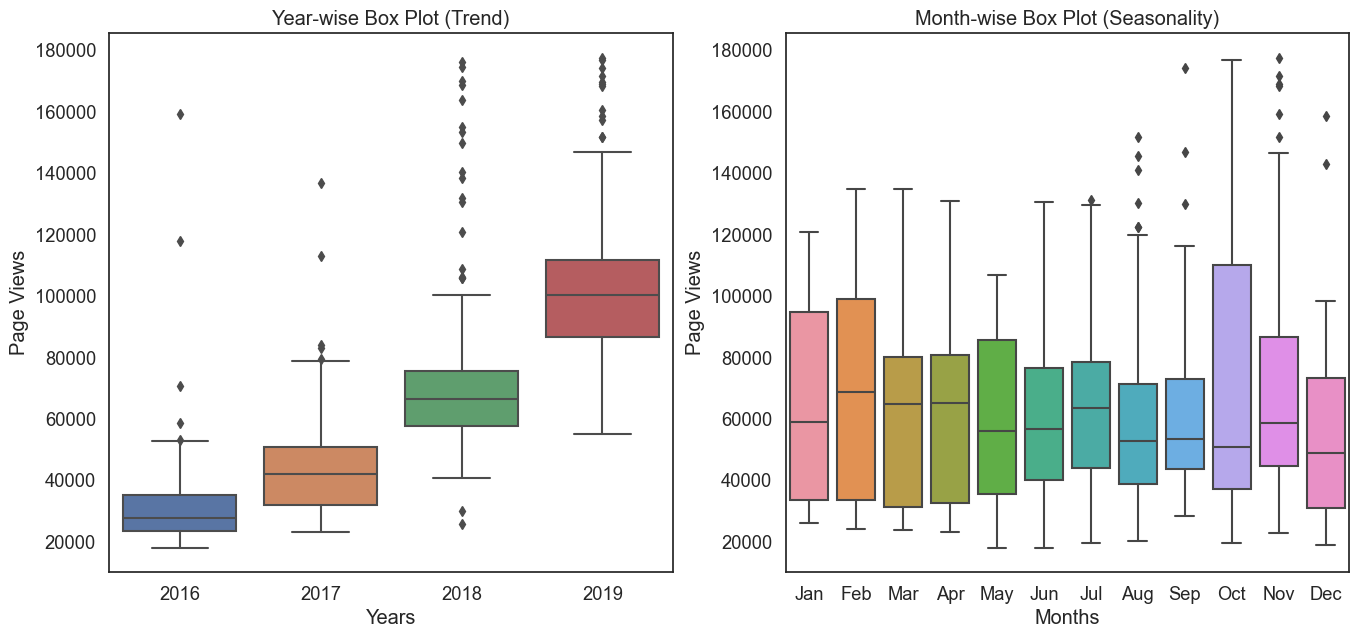

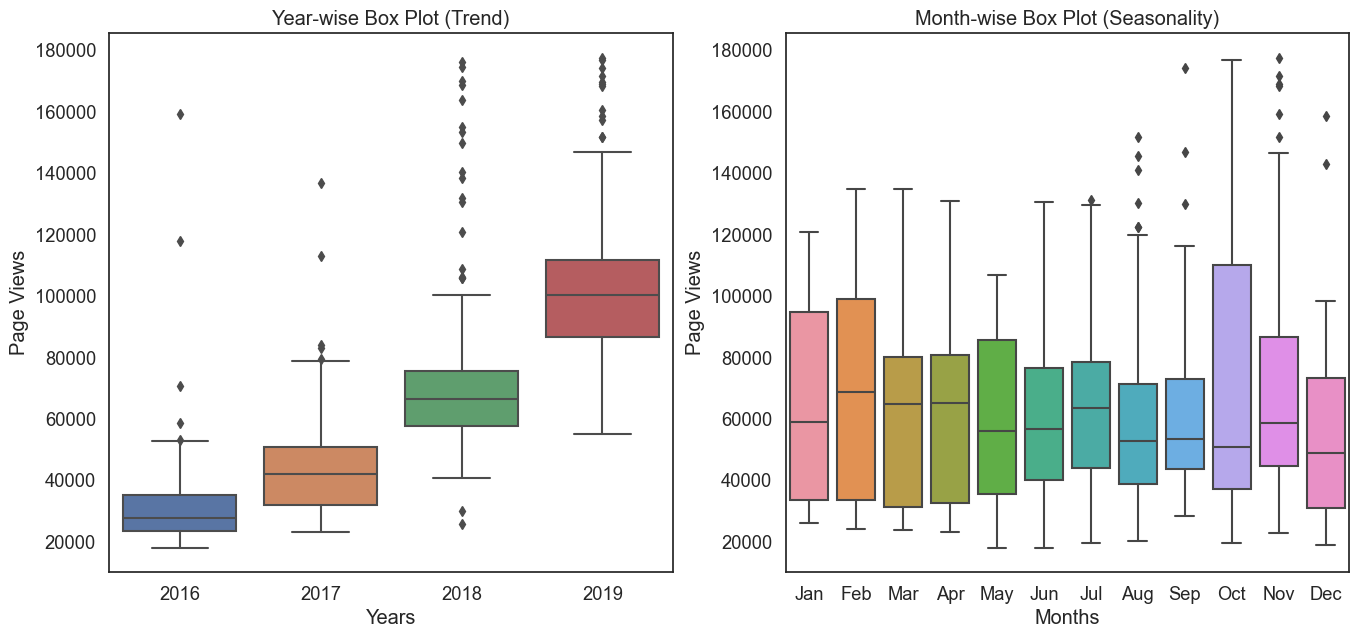

In [ ]:
draw_box_plot()